# **Project #3: Reddit NLP - Data Cleaning & EDA
### DestinyTheGame vs. raidsecrets
*By Daniel Preston McBride*

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import time

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup

In [2]:
dest_reddit = pd.read_csv('../data/dest_reddit.csv')
raid_reddit = pd.read_csv('../data/raid_reddit.csv')

In [3]:
dest_reddit

,subreddit,title,selftext,created_utc,utc_to_datetime
0,DestinyTheGame,The infinite frostbite glitch in DSC has been ...,I hope you a[l](https://www.youtube.com/watch?...,1615996647,2021-03-17 11:57:27
1,DestinyTheGame,Beyond Light Deluxe Edition weapon ornament fo...,My ornament wont unlock even though I have the...,1615996597,2021-03-17 11:56:37
2,DestinyTheGame,Add the Class-Specific Swords as Rewards for G...,[removed],1615996546,2021-03-17 11:55:46
3,DestinyTheGame,The Collector's Edition Sword is Still Sunset.,"Title. This is a problem, because it's a sword...",1615996218,2021-03-17 11:50:18
4,DestinyTheGame,The Darkness or Savathûn might be influencing ...,After seeing the arguement at the Helm this re...,1615996158,2021-03-17 11:49:18
...,...,...,...,...,...
1995,DestinyTheGame,Gambit desperately needs some work in its curr...,"I have some suggestions, TL;DR below\n\n#Gambi...",1615687504,2021-03-13 21:05:04
1996,DestinyTheGame,A head canon story,I'd recommend reading this in the character's ...,1615687093,2021-03-13 20:58:13
1997,DestinyTheGame,A Banshee head canon story,[removed],1615687060,2021-03-13 20:57:40
1998,DestinyTheGame,A Banshee head canon scene,[removed],1615686978,2021-03-13 20:56:18


In [4]:
raid_reddit

,subreddit,title,selftext,created_utc,utc_to_datetime
0,raidsecrets,Bunker E15 Warmind cheese?,So i was running Legendary lost sector bunker ...,1615990366,2021-03-17 10:12:46
1,raidsecrets,I think the New Strike will be the longest yet.,So we know several requirements from the strik...,1615989805,2021-03-17 10:03:25
2,raidsecrets,New Frostbite glitch + jump section on Hunter ...,\*Language Warning\*\n\n[https://vimeo.com/man...,1615980660,2021-03-17 07:31:00
3,raidsecrets,Conqueror hidden triumph for gild?,Anyone know what it is? Can't find any informa...,1615967416,2021-03-17 03:50:16
4,raidsecrets,Full 2 Man GoS Possible ?,Recently with the introduction of stasis cryst...,1615952955,2021-03-16 23:49:15
...,...,...,...,...,...
1995,raidsecrets,Secret Mission in the new hawkmoon area (Spoil...,[removed],1607461955,2020-12-08 16:12:35
1996,raidsecrets,"""Short Circuit"" Triumph (DSC Non-Weekly ""Desce...","As of today's update, the ""Short Circuit"" triu...",1607461768,2020-12-08 16:09:28
1997,raidsecrets,"""Short Circuit"" Triumph Post-Update (REQUIREME...",[deleted],1607461708,2020-12-08 16:08:28
1998,raidsecrets,DSC Secrect Triumph shown on the app,[DSC Secrect Triumph](https://imgur.com/galler...,1607461666,2020-12-08 16:07:46


In [5]:
reddit = pd.concat([dest_reddit, raid_reddit])

In [6]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subreddit        4000 non-null   object
 1   title            4000 non-null   object
 2   selftext         3950 non-null   object
 3   created_utc      4000 non-null   int64 
 4   utc_to_datetime  4000 non-null   object
dtypes: int64(1), object(4)
memory usage: 187.5+ KB


---
### Investigating null values in the `selftext` column.

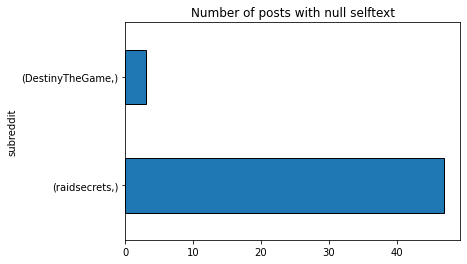

In [10]:
reddit[reddit['selftext'].isnull()][['subreddit']].value_counts().plot(kind='barh', linewidth=1, edgecolor='black')
plt.title('Number of posts with null selftext');

In [ ]:
plt.figure(figsize=(12,8))
plt.bar()

In [8]:
reddit.dropna(inplace=True)

---
### Noticed previously that some `selftext` had been [removed] or [deleted].  Doing some exploring to see the distribution of removed and deleted `selftext` arcoss both subreddits.

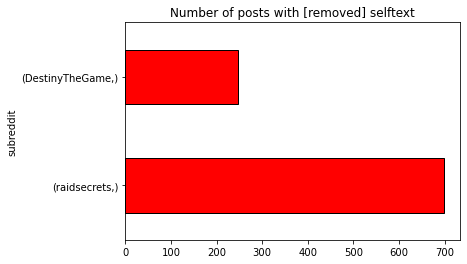

In [24]:
reddit[reddit['selftext']=='[removed]'][['subreddit']].value_counts().plot(kind='barh', color='red', linewidth=1, edgecolor='black')
plt.title('Number of posts with [removed] selftext');

> **Noticing a much higher number of posts on the `raidsecrets` have their selftext removed.  It seems like this forum is moderated to a much higher standard compared to the DestinyTheGame subreddit.**

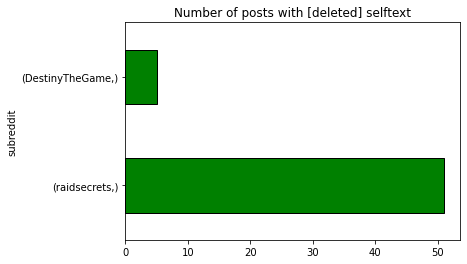

In [20]:
reddit[reddit['selftext']=='[deleted]'][['subreddit']].value_counts().plot(kind='barh', color='green', linewidth=1, edgecolor='black')
plt.title('Number of posts with [deleted] selftext');

> **Subreddit Moderators have the power to remove posts, while users can choose to delete their own posts.  Referenced from: https://www.reddithelp.com/hc/en-us/articles/204533859-What-is-a-moderator-**

In [11]:
reddit.drop(index=reddit[reddit['selftext']=='[deleted]'].index, inplace=True)

**Because the [removed] posts make up a significant portion of the raidsecrets subreddit AND the moderation level of the raidsecrets subreddit might help predicted that post came from raidsecrets, I decided to leave all the [removed] posts and drop all the rows where the selftext is [deleted]**

In [12]:
# reddit.drop(index=reddit[reddit['selftext']=='[removed]'].index, inplace=True)

**Decided NOT to remove the [removed] selftext entries (thought it was causing issues with my modeling).**

In [13]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3838 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subreddit        3838 non-null   object
 1   title            3838 non-null   object
 2   selftext         3838 non-null   object
 3   created_utc      3838 non-null   int64 
 4   utc_to_datetime  3838 non-null   object
dtypes: int64(1), object(4)
memory usage: 179.9+ KB


---
### Classifying the DestinyTheGame subreddit as 1 and raidsecrets as 0

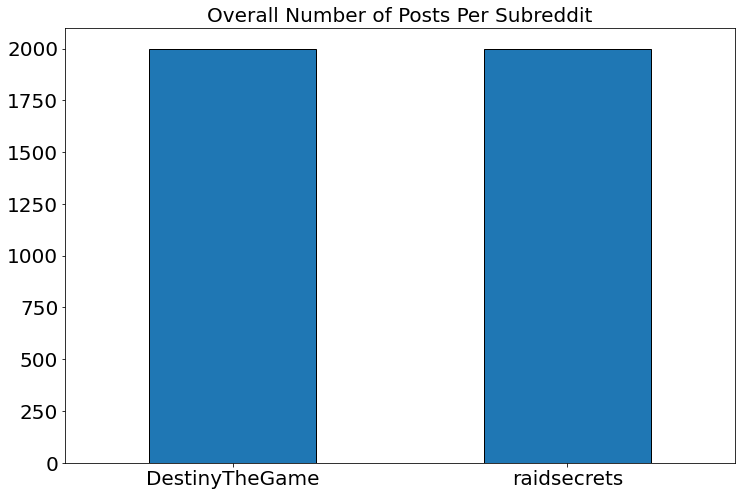

In [22]:
plt.figure(figsize=(12,8))
reddit['subreddit'].value_counts().plot(kind='bar', linewidth=1, edgecolor='black')
plt.xticks(rotation=0, size=20)
plt.yticks(size=20)
plt.title('Overall Number of Posts Per Subreddit', size=20);

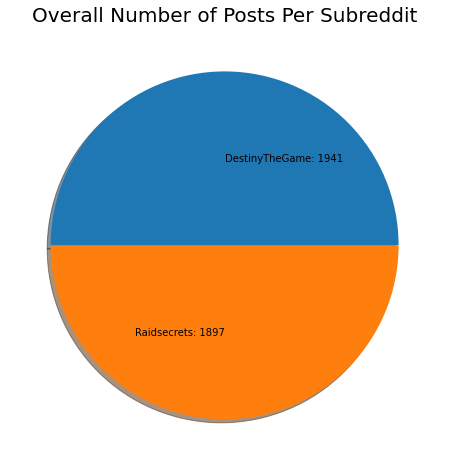

In [44]:
plt.figure(figsize=(12,8))
plt.pie(reddit['subreddit'].value_counts(), labels=['DestinyTheGame: 1941','Raidsecrets: 1897'], labeldistance=.5, shadow=True)
plt.title('Overall Number of Posts Per Subreddit', size=20);

In [15]:
reddit['subreddit'] = reddit['subreddit'].map({'DestinyTheGame': 1, 'raidsecrets': 0})

In [16]:
reddit['subreddit'].value_counts()

1    1941
0    1897
Name: subreddit, dtype: int64

---
### Dropping the `created_utc` and `utc_to_datetime` columns since I don't need them for my model. (Only used them previously to verify I was scraping new data)

In [17]:
reddit.drop(columns=['created_utc', 'utc_to_datetime'], inplace=True)

In [18]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3838 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3838 non-null   int64 
 1   title      3838 non-null   object
 2   selftext   3838 non-null   object
dtypes: int64(1), object(2)
memory usage: 119.9+ KB


In [19]:
reddit.head()

,subreddit,title,selftext
0,1,The infinite frostbite glitch in DSC has been ...,I hope you a[l](https://www.youtube.com/watch?...
1,1,Beyond Light Deluxe Edition weapon ornament fo...,My ornament wont unlock even though I have the...
2,1,Add the Class-Specific Swords as Rewards for G...,[removed]
3,1,The Collector's Edition Sword is Still Sunset.,"Title. This is a problem, because it's a sword..."
4,1,The Darkness or Savathûn might be influencing ...,After seeing the arguement at the Helm this re...


In [20]:
reddit.to_csv('../data/reddit_data.csv', index=False)